In [133]:
#Cell 1
#importing libraries
import numpy as np
import pandas as pd
import math
import operator
import random
import matplotlib.pyplot as plt
import warnings

In [134]:
#Cell 2
class City:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def distance_to(self, other):
        return np.sqrt((self.x - other.x)**2 + (self.y - other.y)**2)
    
    def __repr__(self):
        return f"({self.x}, {self.y})"

In [135]:
#Cell 3
def create_distance_matrix(cities):
    n = len(cities)
    distance_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if i != j:
                distance_matrix[i, j] = cities[i].distance_to(cities[j])
    return distance_matrix


In [136]:
#Cell 4
citylist = [City(x=int(random.random() * 200), y=int(random.random() * 200)) for _ in range(25)]
#citylist= [City(x=150,y=82),City(x=130,y=70),City(x=130,y=90),City(x=110,y=38),City(x=100,y=40),City(x=100,y=60),City(x=100,y=120),City(x=100,y=140),City(x=100,y=160),City(x=100,y=180),City(x=100,y=200),City(x=80,y=20),City(x=80,y=40),City(x=80,y=60),City(x=80,y=80),City(x=80,y=100),City(x=80,y=120),City(x=80,y=140),City(x=80,y=160),City(x=80,y=180),City(x=80,y=200),City(x=60,y=20),City(x=60,y=40),City(x=60,y=60),City(x=60,y=80)]
print("Cities : ", citylist)

distance_matrix = create_distance_matrix(citylist)


Cities :  [(192, 42), (100, 71), (92, 153), (97, 159), (3, 116), (34, 116), (73, 165), (71, 35), (120, 21), (21, 66), (72, 190), (15, 102), (158, 20), (163, 62), (58, 32), (195, 86), (47, 2), (92, 78), (34, 86), (159, 132), (42, 52), (23, 1), (70, 180), (170, 162), (67, 63)]


In [137]:
# Cell 5: PSO parameters
num_particles = 100
num_iterations = 200
inertia_weight = 0.9
cognitive_coeff = 1.5
social_coeff = 1.5

In [138]:
#Cell 6
# Helper functions
warnings.filterwarnings("ignore", category=RuntimeWarning)

def create_initial_population(num_particles, num_nodes):
    population = []
    for _ in range(num_particles):
        particle = np.random.permutation(num_nodes)
        population.append(particle)
    return population

def calculate_fitness(particle, distance_matrix):
    fitness = 0
    for i in range(len(particle) - 1):
        fitness += distance_matrix[particle[i], particle[i + 1]]
    fitness += distance_matrix[particle[-1], particle[0]]
    return fitness

def update_velocity(particle, velocity, best_personal_position, best_global_position, inertia_weight, cognitive_coeff, social_coeff):
    new_velocity = inertia_weight * velocity
    cognitive_component = cognitive_coeff * np.random.random() * (best_personal_position - particle)
    social_component = social_coeff * np.random.random() * (best_global_position - particle)
    new_velocity += cognitive_component + social_component
    return new_velocity

def apply_velocity(particle, velocity):
    new_particle = particle + velocity
    new_particle = np.mod(new_particle, len(particle))
    new_particle = np.argsort(new_particle)
    return new_particle

In [139]:
#Cell 7
# Local search function
def two_opt_local_search(route, distance_matrix, max_iterations=100):
    best_route = route.copy()
    best_distance = calculate_fitness(best_route, distance_matrix)
    improved = True
    iteration = 0

    while improved and iteration < max_iterations:
        improved = False
        for i in range(1, len(route) - 2):
            for j in range(i + 1, len(route)):
                new_route = two_opt_swap(best_route, i, j)
                new_distance = calculate_fitness(new_route, distance_matrix)
                if new_distance < best_distance:
                    best_route = new_route
                    best_distance = new_distance
                    improved = True
        iteration += 1

    return best_route, best_distance

def two_opt_swap(route, i, j):
    new_route = route.copy()
    new_route[i:j+1] = route[j:i-1:-1]
    return new_route

In [140]:
#Cell 8
# Hybrid PSO algorithm implementation
def hybrid_pso_tsp(distance_matrix, num_particles, num_iterations, inertia_weight, cognitive_coeff, social_coeff):
    num_nodes = distance_matrix.shape[0]
    population = create_initial_population(num_particles, num_nodes)
    velocities = [np.zeros(num_nodes) for _ in range(num_particles)]
    
    best_personal_positions = population.copy()
    best_personal_fitnesses = [calculate_fitness(p, distance_matrix) for p in population]
    best_global_position = best_personal_positions[np.argmin(best_personal_fitnesses)]
    best_global_fitness = min(best_personal_fitnesses)
    
    for iteration in range(num_iterations):
        for i in range(num_particles):
            # Apply PSO update
            velocities[i] = update_velocity(population[i], velocities[i], best_personal_positions[i], best_global_position, inertia_weight, cognitive_coeff, social_coeff)
            population[i] = apply_velocity(population[i], velocities[i])
            
            # Apply local search
            improved_route, improved_fitness = two_opt_local_search(population[i], distance_matrix)
            population[i] = improved_route
            
            if improved_fitness < best_personal_fitnesses[i]:
                best_personal_fitnesses[i] = improved_fitness
                best_personal_positions[i] = improved_route
            if improved_fitness < best_global_fitness:
                best_global_fitness = improved_fitness
                best_global_position = improved_route
        
        print(f"Iteration {iteration + 1}/{num_iterations}, Best path length: {best_global_fitness}")
    
    return best_global_position, best_global_fitness

# Running the Hybrid PSO algorithm
best_path, best_path_length = hybrid_pso_tsp(distance_matrix, num_particles, num_iterations, inertia_weight, cognitive_coeff, social_coeff)
print(f"Best path found: {best_path} with length {best_path_length}")

Iteration 1/200, Best path length: 824.1874533887116
Iteration 2/200, Best path length: 824.1874533887116
Iteration 3/200, Best path length: 824.1874533887116
Iteration 4/200, Best path length: 824.1874533887116
Iteration 5/200, Best path length: 824.1874533887116
Iteration 6/200, Best path length: 824.1874533887116
Iteration 7/200, Best path length: 824.1874533887116
Iteration 8/200, Best path length: 824.1874533887116
Iteration 9/200, Best path length: 824.1874533887116
Iteration 10/200, Best path length: 824.1874533887116
Iteration 11/200, Best path length: 824.1874533887116
Iteration 12/200, Best path length: 824.1874533887116
Iteration 13/200, Best path length: 824.1874533887116
Iteration 14/200, Best path length: 824.1874533887116
Iteration 15/200, Best path length: 824.1874533887116
Iteration 16/200, Best path length: 824.1874533887116
Iteration 17/200, Best path length: 824.1874533887116
Iteration 18/200, Best path length: 824.1874533887116
Iteration 19/200, Best path length: 8

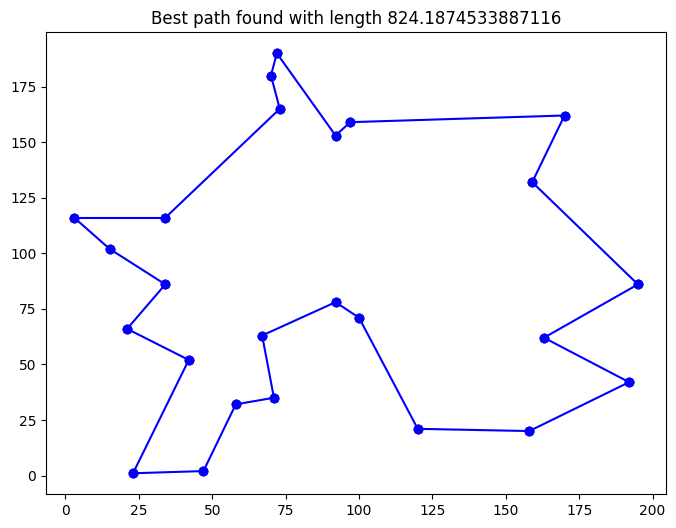

In [141]:
#Cell 9
# Plotting the result
def plot_tsp_path(citylist, path):
    coordinates = [(city.x, city.y) for city in citylist]
    plt.figure(figsize=(8, 6))
    for i in range(len(path)):
        start = coordinates[path[i]]
        end = coordinates[path[(i + 1) % len(path)]]
        plt.plot([start[0], end[0]], [start[1], end[1]], 'bo-')
    plt.scatter(*zip(*coordinates), color='red')
    plt.title(f"Best path found with length {best_path_length}")
    plt.show()

plot_tsp_path(citylist, best_path)